In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
import math
from word2number import w2n

print('hello')

hello


In [9]:
df = pd.read_csv('data\hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
median_test_score = math.floor(df['test_score(out of 10)'].median())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)

NaExperience = 'zero'
df['experience'] = df['experience'].fillna(NaExperience)
df.experience = df.experience.apply(w2n.word_to_num)

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [5]:
reg.predict(pd.DataFrame([[2, 9, 6]], columns=['experience', 'test_score(out of 10)', 'interview_score(out of 10)']))

array([53205.96797671])

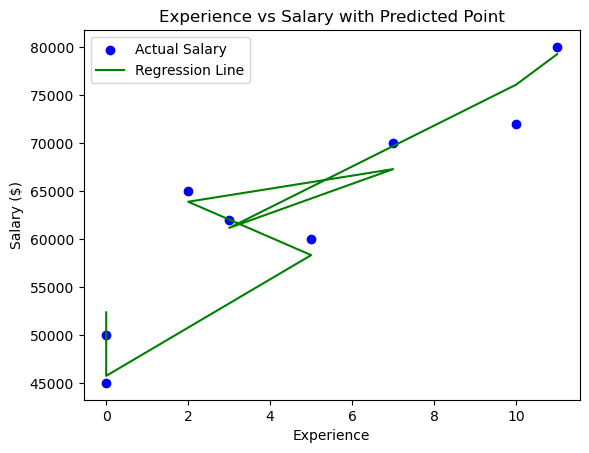

In [6]:
plt.scatter(df['experience'], df['salary($)'], color='blue', label='Actual Salary')
plt.plot(df['experience'], reg.predict(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]), color='green', label='Regression Line')

plt.xlabel('Experience')
plt.ylabel('Salary ($)')
plt.title('Experience vs Salary with Predicted Point')
plt.legend()
plt.show()